## Расширение типов данных

In [1]:
import pandas as pd
import numpy as np

In [2]:
series1 = pd.Series([4,5,6,7],dtype='int32')  # тип int32
series1

0    4
1    5
2    6
3    7
dtype: int32

### ПРОБЛЕМА!
#### иногда (например в случае отсутствующих данных, строковых и некоторых других типах данных) pandas преобразует эти типы во float64, что неэффективно и потребляет больше памяти

In [3]:
series2 = pd.Series([1, 2, None, 3])
series2  # заметим, что позиция 2 - NaN, при этом тип данных float64

0    1.0
1    2.0
2    NaN
3    3.0
dtype: float64

In [ ]:
# если попробуем указать dtype='int32/64' и тд', то произойдёт ошибка
# series2 = pd.Series([1,2,None,3],dtype='int32')
# ERROR

In [4]:
# расширим тип данных, используя заглавную букву (dtype='Int64')
series2 = pd.Series([1, 2, None, 3],dtype='Int32')
series2  # <NA> - > означает, что в  массиве расширенного типа отсутствует значение

0       1
1       2
2    <NA>
3       3
dtype: Int32

** В pandas имеется также расширенный тип специально для строковых данных, в котором не используются массивы NumPy (для его работы необходима библиотека pyarrow, которую придется устанавливать отдельно)

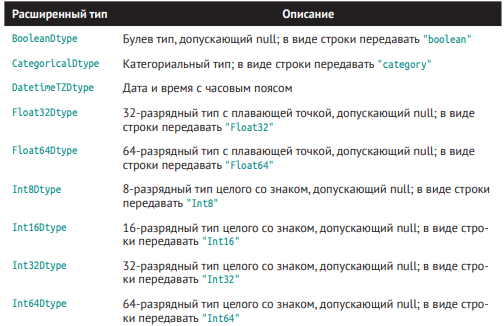
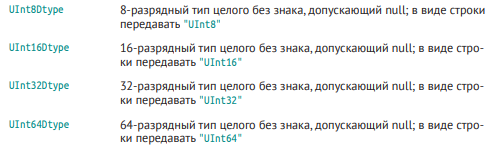

## Манипуляции со строками

#### Встроенные методы строковых объектов

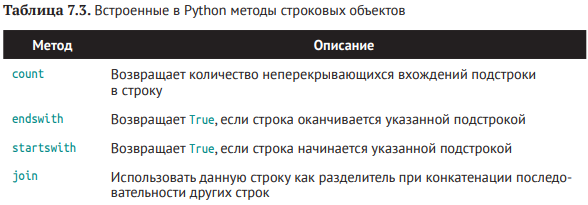
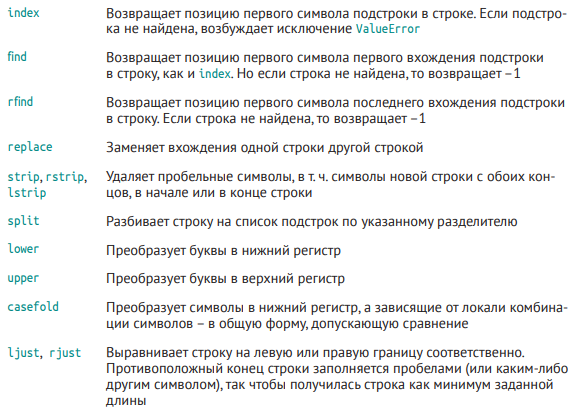

### Регулярные выражения

In [5]:
import re 

In [6]:
text1 = 'alex  vanya            slavik       oxxxy kpss'

In [7]:
re.split(r'\s+',text1)  # разбивает строку по шаблону | сначала компилируется регулярное выражение, потом применяется split()

['alex', 'vanya', 'slavik', 'oxxxy', 'kpss']

In [8]:
re_example = re.compile(r'\s+')  # отдельно компилируем (составляем) регулярное выражение
re_example.split(text1)  # используем его

['alex', 'vanya', 'slavik', 'oxxxy', 'kpss']

In [9]:
re_example.findall(text1)  # находит "участки", подходящие под шаблон

['  ', '            ', '       ', ' ']

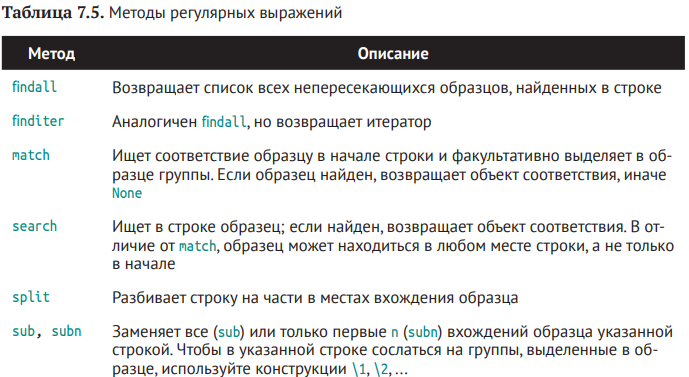

## Строковые функции в pandas

In [10]:
series3 = pd.Series(['moscow','klin','zaharovo',np.nan])
series3

0      moscow
1        klin
2    zaharovo
3         NaN
dtype: object

In [11]:
# атрибут str для доступа к методам строк
series3.str.upper()  # если использовать map, то будет ошибка из за NaN

0      MOSCOW
1        KLIN
2    ZAHAROVO
3         NaN
dtype: object

In [12]:
series3.str.contains('moscow')

0     True
1    False
2    False
3      NaN
dtype: object

In [13]:
series3.str.get(0)

0      m
1      k
2      z
3    NaN
dtype: object

In [14]:
series3.str[0:3]  # cрезы

0    mos
1    kli
2    zah
3    NaN
dtype: object

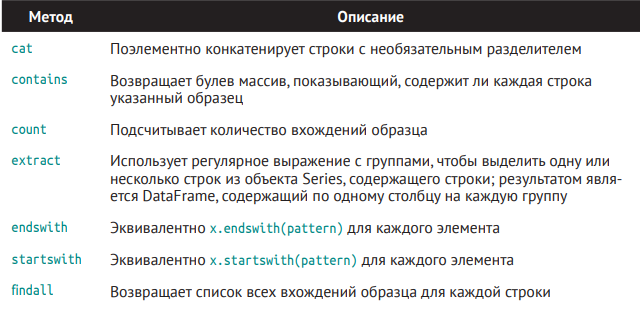
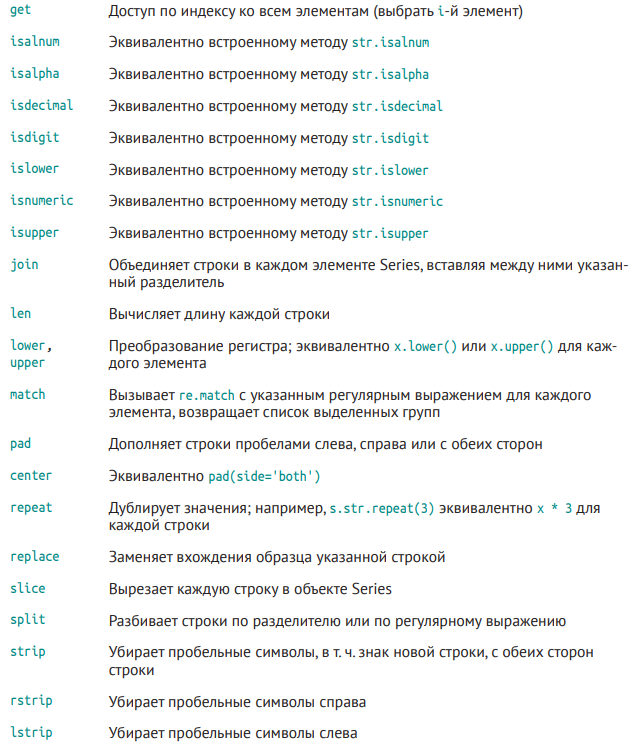

## Категориальные данные

In [15]:
words = pd.Series(['free','medium','pro'])
nums = pd.Series(np.random.randint(0,3,10))
words.take(nums)   # проводит соотвесвтие между кодами и категориями

1    medium
0      free
1    medium
2       pro
1    medium
1    medium
1    medium
1    medium
1    medium
2       pro
dtype: object

## Расширенный тип Categorical в pandas

В pandas имеется расширенный тип Categorical, специально предназначенный 
для хранения данных, представленных целочисленными категориями, т.  е. 
в некоторой кодировке. Это популярная техника сжатия, применяемая, когда 
данные содержат много одинаковых значений. Она может дать значительный 
прирост производительности и  одновременно снизить потребление памяти, 
особенно в случае строковых данных.

In [16]:
dict_football = {'name':['messi','ronaldo','neymar','ibra','mbappe','ramos','alba','modric','xavi', 'de_bruyne', 'haaland'], 'speed':[7,8,9,6,10,6,7,7,7,7,9],'shoot':[10,9,7,7,8,7,6,8,7,8,8],'dribbling':[10,7,9,7,8,5,6,7,8,7,6],'pas':[10,6,8,7,7,7,8,9,9,10,6],'phy':[7,9,6,8,7,7,6,7,6,7,10],'def':[6,5,5,6,4,9,7,7,8,7,5]}

data_football = pd.DataFrame(dict_football)
data_football = data_football.set_index('name')
data_football

,speed,shoot,dribbling,pas,phy,def
name,,,,,,
messi,7,10,10,10,7,6
ronaldo,8,9,7,6,9,5
neymar,9,7,9,8,6,5
ibra,6,7,7,7,8,6
mbappe,10,8,8,7,7,4
ramos,6,7,5,7,7,9
alba,7,6,6,8,6,7
modric,7,8,7,9,7,7
xavi,7,7,8,9,6,8


In [17]:
data_football['rating'] = 0

In [18]:
data_football['rating'] = data_football.iloc[:,:-1].sum(axis=1).map(lambda x: int((x/6)*10+8.5))
data_football

,speed,shoot,dribbling,pas,phy,def,rating
name,,,,,,,
messi,7,10,10,10,7,6,91
ronaldo,8,9,7,6,9,5,81
neymar,9,7,9,8,6,5,81
ibra,6,7,7,7,8,6,76
mbappe,10,8,8,7,7,4,81
ramos,6,7,5,7,7,9,76
alba,7,6,6,8,6,7,75
modric,7,8,7,9,7,7,83
xavi,7,7,8,9,6,8,83


In [19]:
def make_position(data_football):
    '''Функция определяет позицию игрока по его данным'''
    attack = ['speed','shoot','dribbling','speed','shoot']
    middle = ['pas','phy','phy','pas','def']
    defend = ['def','phy','def','def','pas']
    data_football.loc[:,'position'] = 0
    for player in data_football.index:
        best_position = 0
        for position in attack,middle,defend:
            new_position = data_football.loc[player,position].sum()
            if new_position >= best_position:
                best_position = new_position
                if position ==attack:
                    role = 'attack'
                elif position ==middle:
                    role = 'middle'
                else:
                    role = 'defender'
        data_football.loc[player,'position'] = role

In [20]:
make_position(data_football)
data_football

,speed,shoot,dribbling,pas,phy,def,rating,position
name,,,,,,,,
messi,7,10,10,10,7,6,91,attack
ronaldo,8,9,7,6,9,5,81,attack
neymar,9,7,9,8,6,5,81,attack
ibra,6,7,7,7,8,6,76,middle
mbappe,10,8,8,7,7,4,81,attack
ramos,6,7,5,7,7,9,76,defender
alba,7,6,6,8,6,7,75,defender
modric,7,8,7,9,7,7,83,middle
xavi,7,7,8,9,6,8,83,defender


In [21]:
# здесь data_football['position'] - массив строковых данных
# преобразуем его к категориальным данным
position_category = data_football['position'].astype('category')
position_category

name
messi          attack
ronaldo        attack
neymar         attack
ibra           middle
mbappe         attack
ramos        defender
alba         defender
modric         middle
xavi         defender
de_bruyne      middle
haaland        attack
Name: position, dtype: category
Categories (3, object): ['attack', 'defender', 'middle']

In [22]:
c = position_category.array
c

['attack', 'attack', 'attack', 'middle', 'attack', ..., 'defender', 'middle', 'defender', 'middle', 'attack']
Length: 11
Categories (3, object): ['attack', 'defender', 'middle']

In [23]:
c.categories

Index(['attack', 'defender', 'middle'], dtype='object')

In [24]:
c.codes

array([0, 0, 0, 2, 0, 1, 1, 2, 1, 2, 0], dtype=int8)

In [25]:
# cтолбец DataFrame можно преобразовать в категориальную форму с помощью такого присваивания:
data_football['position'] = data_football['position'].astype('category')
data_football

,speed,shoot,dribbling,pas,phy,def,rating,position
name,,,,,,,,
messi,7,10,10,10,7,6,91,attack
ronaldo,8,9,7,6,9,5,81,attack
neymar,9,7,9,8,6,5,81,attack
ibra,6,7,7,7,8,6,76,middle
mbappe,10,8,8,7,7,4,81,attack
ramos,6,7,5,7,7,9,76,defender
alba,7,6,6,8,6,7,75,defender
modric,7,8,7,9,7,7,83,middle
xavi,7,7,8,9,6,8,83,defender


In [26]:
codes = [2,1,0,1,2,2,1,0,0,1,0,2,0,1,1,2,1,0]
cats = pd.Categorical.from_codes(codes,c.categories)   # из других источников на основе кодов
cats

['middle', 'defender', 'attack', 'defender', 'middle', ..., 'defender', 'defender', 'middle', 'defender', 'attack']
Length: 18
Categories (3, object): ['attack', 'defender', 'middle']

In [27]:
cats.as_ordered()   # упорядоченные категории

['middle', 'defender', 'attack', 'defender', 'middle', ..., 'defender', 'defender', 'middle', 'defender', 'attack']
Length: 18
Categories (3, object): ['attack' < 'defender' < 'middle']

In [28]:
cats.sort_values()  # например, чтобы отсортировать данные

['attack', 'attack', 'attack', 'attack', 'attack', ..., 'middle', 'middle', 'middle', 'middle', 'middle']
Length: 18
Categories (3, object): ['attack', 'defender', 'middle']

In [29]:
# Специальный акцессор cat открывает доступ к категориальным методам
data_football['position'].cat.categories

Index(['attack', 'defender', 'middle'], dtype='object')

In [30]:
data_football['position'].cat.codes

name
messi        0
ronaldo      0
neymar       0
ibra         2
mbappe       0
ramos        1
alba         1
modric       2
xavi         1
de_bruyne    2
haaland      0
dtype: int8

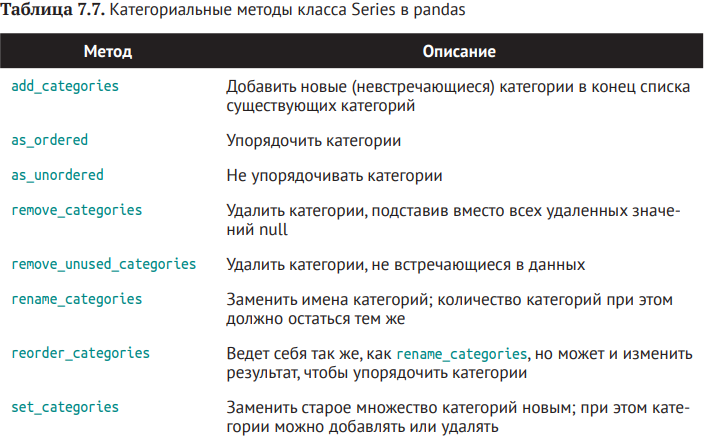

## Создание индикаторных переменных для моделирования

При работе с инструментами статистики или машинного обучения категориальные данные часто преобразуются в  индикаторные переменные; этот процесс называется также унитарным кодированием. При этом создается объект 
DataFrame, содержащий по одному столбцу для каждой категории; в  этих 
столбцах 1 обозначает присутствие данной категории, а 0 – ее отсутствие.

In [31]:
pd.get_dummies(data_football['position'])

,attack,defender,middle
name,,,
messi,1,0,0
ronaldo,1,0,0
neymar,1,0,0
ibra,0,0,1
mbappe,1,0,0
ramos,0,1,0
alba,0,1,0
modric,0,0,1
xavi,0,1,0


In [32]:
data_football.to_csv('data_football')